In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
from itertools import groupby
%matplotlib inline

In [114]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,8),'figure.dpi':(300)})

In [7]:
url2test = 'https://apps.bea.gov/api/data/?&UserID=F2205008-0F90-4F72-B77E-D7938D6188E6&ResultFormat=JSON&&method=GETDATA&datasetname=MNE&DirectionOfInvestment=Outward&Classification=Country&Year=All'

In [8]:
class MNEProcessing:
    def __init__(self, url):
        self.address = url
    
    def dataRetrieval(self):
        req = requests.get(self.address)
        ret = req.json()['BEAAPI']['Results']['Data']
        return ret
    
    def parseData(self):
        data = self.dataRetrieval()
        data.sort(key=itemgetter('SeriesID','RowCode','Row','Year'))
        series25 = []
        for category, value in groupby(data, key=itemgetter('SeriesID','RowCode')):
            for i in value:
                series25.append(i)
        return series25
    
a1 = MNEProcessing(url2test)

In [9]:
a = a1.parseData()

In [90]:
data = pd.DataFrame(a)

In [91]:
data.drop(['ColumnGParent','ColumnParent','Column','RowCode','ColumnCode','ColumnParentCode'],axis=1, inplace=True)

In [92]:
countrylist = sorted(data['Row'].unique()) #available countries, sort by max quantities 

In [93]:
countrylist

['Addenda:',
 'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'All Countries Total',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia and Pacific',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Central America',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote D'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Eastern Europe',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europ

In [94]:
data['SeriesName'].unique()

array(['Reinvestment of Earnings Without Current-Cost Adjustment',
       'Direct Investment Income Without Current-Cost Adjustment',
       'U.S. Direct Investment Position Abroad on a Historical-Cost Basis',
       'Financial Outflow Transactions Without Current-Cost Adjustment',
       'Equity Outflows Other than Reinvestment of Earnings',
       'Debt Instruments Outflows',
       "Royalties and License Fees Net of Withholding Taxes, U.S. Parents' Receipts",
       "Other Private Services, U.S.  Parents' Receipts",
       "Royalties and License Fees Net of Withholding Taxes, U.S. Parents' Payments",
       "Other Private Services, U.S. Parents' Payments"], dtype=object)

In [95]:
maxquant = data.groupby('SeriesID').get_group('33')

In [96]:
maxquant

,Year,SeriesID,SeriesName,Row,ColumnGParentCode,TableScale,DataValueUnformatted,TableColumnDisplayOrder,TableRowDisplayOrder,DataValue
17624,1999,33,Debt Instruments Outflows,Addenda:,0,Millions of Dollars,n.a.,1.00,80.00,
17625,2000,33,Debt Instruments Outflows,Addenda:,0,Millions of Dollars,n.a.,1.00,80.00,
17626,2001,33,Debt Instruments Outflows,Addenda:,0,Millions of Dollars,n.a.,1.00,80.00,
17627,2002,33,Debt Instruments Outflows,Addenda:,0,Millions of Dollars,n.a.,1.00,80.00,
17628,2003,33,Debt Instruments Outflows,Addenda:,0,Millions of Dollars,n.a.,1.00,80.00,
...,...,...,...,...,...,...,...,...,...,...
19285,2014,33,Debt Instruments Outflows,OPEC,0,Millions of Dollars,3159,1.00,83.00,"3,159"
19286,2015,33,Debt Instruments Outflows,OPEC,0,Millions of Dollars,-2584,1.00,83.00,"-2,584"
19287,2016,33,Debt Instruments Outflows,OPEC,0,Millions of Dollars,2261,1.00,83.00,"2,261"
19288,2017,33,Debt Instruments Outflows,OPEC,0,Millions of Dollars,-590,1.00,83.00,-590


In [97]:
mq = pd.to_numeric(maxquant['DataValueUnformatted'], errors='coerce')

In [98]:
mq = maxquant[['Year','SeriesName','SeriesID','Row']].join(mq).dropna()

In [99]:
print(mq)

       Year                 SeriesName SeriesID           Row  \
17640  2000  Debt Instruments Outflows       33  Other-Africa   
17641  2001  Debt Instruments Outflows       33  Other-Africa   
17644  2004  Debt Instruments Outflows       33  Other-Africa   
17645  2005  Debt Instruments Outflows       33  Other-Africa   
17646  2006  Debt Instruments Outflows       33  Other-Africa   
...     ...                        ...      ...           ...   
19285  2014  Debt Instruments Outflows       33          OPEC   
19286  2015  Debt Instruments Outflows       33          OPEC   
19287  2016  Debt Instruments Outflows       33          OPEC   
19288  2017  Debt Instruments Outflows       33          OPEC   
19289  2018  Debt Instruments Outflows       33          OPEC   

       DataValueUnformatted  
17640                -483.0  
17641                1207.0  
17644               -2149.0  
17645                -998.0  
17646                1424.0  
...                     ...  
19285    

In [120]:
mq['Year'] = pd.to_datetime(mq['Year'])

In [100]:
tocalc = {}
for x in mq['Row'].unique():
    tocalc[x] = mq.groupby('Row').get_group(x)

In [101]:
csums = {}
for k,v in tocalc.items():
    csums[k] = abs(v['DataValueUnformatted'].sum())

In [102]:
print(csums.keys())

dict_keys(['Other-Africa', 'Other-Asia and Pacific', 'Other-Central America', 'Other-Europe', 'Other-Middle East', 'Other-Other Western Hemisphere', 'Other-South America', 'All Countries Total', 'Canada', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'Honduras', 'Mexico', 'Panama', 'Peru', 'Venezuela', 'Barbados', 'Bermuda', 'United Kingdom Islands, Caribbean', 'South America', 'Central America', 'Other Western Hemisphere', 'Latin America and Other Western Hemisphere', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'Russia', 'Hungary', 'Poland', 'Czech Republic', 'Eastern Europe', 'European Union', 'Europe', 'Egypt', 'Nigeria', 'South Africa', 'Africa', 'Israel', 'Saudi Arabia', 'United Arab Emirates', 'Middle East', 'Australia', 'Hong Kong', 'India', 'Indonesia', 'Japan', 'Malaysia'

In [103]:
print(max(csums.values()))

115982.0


In [104]:
sortsums = {k: v for k, v in sorted(csums.items(), key=lambda item: item[1])}

In [105]:
print(sortsums)

{'Denmark': 11.0, 'Greece': 20.0, 'Turkey': 40.0, 'Israel': 93.0, 'Hungary': 124.0, 'Other-Central America': 127.0, 'Ecuador': 145.0, 'South Africa': 218.0, 'Honduras': 231.0, 'Philippines': 237.0, 'Dominican Republic': 344.0, 'Finland': 360.0, 'Mexico': 370.0, 'Colombia': 409.0, 'Czech Republic': 495.0, 'Panama': 502.0, 'Austria': 556.0, 'Poland': 565.0, 'Venezuela': 604.0, 'India': 656.0, 'South Korea': 781.0, 'Russia': 890.0, 'South America': 972.0, 'Other-Asia and Pacific': 979.0, 'Saudi Arabia': 1059.0, 'Portugal': 1085.0, 'New Zealand': 1359.0, 'Costa Rica': 1400.0, 'Other-South America': 1556.0, 'Thailand': 1579.0, 'China': 1608.0, 'Peru': 1697.0, 'Malaysia': 1704.0, 'Taiwan': 1796.0, 'Indonesia': 1870.0, 'Spain': 1986.0, 'Chile': 2040.0, 'Egypt': 2098.0, 'Italy': 2115.0, 'Brazil': 2633.0, 'Nigeria': 2721.0, 'Switzerland': 2884.0, 'Eastern Europe': 2997.0, 'Hong Kong': 3315.0, 'Canada': 3418.0, 'United Arab Emirates': 3533.0, 'Barbados': 3575.0, 'Other-Other Western Hemisphere':

In [106]:
selcountries = list(sortsums.keys())[-40:]

In [107]:
print(selcountries)

['Chile', 'Egypt', 'Italy', 'Brazil', 'Nigeria', 'Switzerland', 'Eastern Europe', 'Hong Kong', 'Canada', 'United Arab Emirates', 'Barbados', 'Other-Other Western Hemisphere', 'Netherlands', 'Central America', 'Other-Middle East', 'France', 'OPEC', 'Other-Europe', 'Africa', 'Belgium', 'Sweden', 'Norway', 'Argentina', 'Germany', 'Other-Africa', 'Luxembourg', 'Other Western Hemisphere', 'Middle East', 'Latin America and Other Western Hemisphere', 'United Kingdom Islands, Caribbean', 'Singapore', 'Bermuda', 'Asia and Pacific', 'United Kingdom', 'Australia', 'Japan', 'Europe', 'European Union', 'All Countries Total', 'Ireland']


In [136]:
print(len(selcountries))

40


AttributeError: 'numpy.ndarray' object has no attribute 'legend'

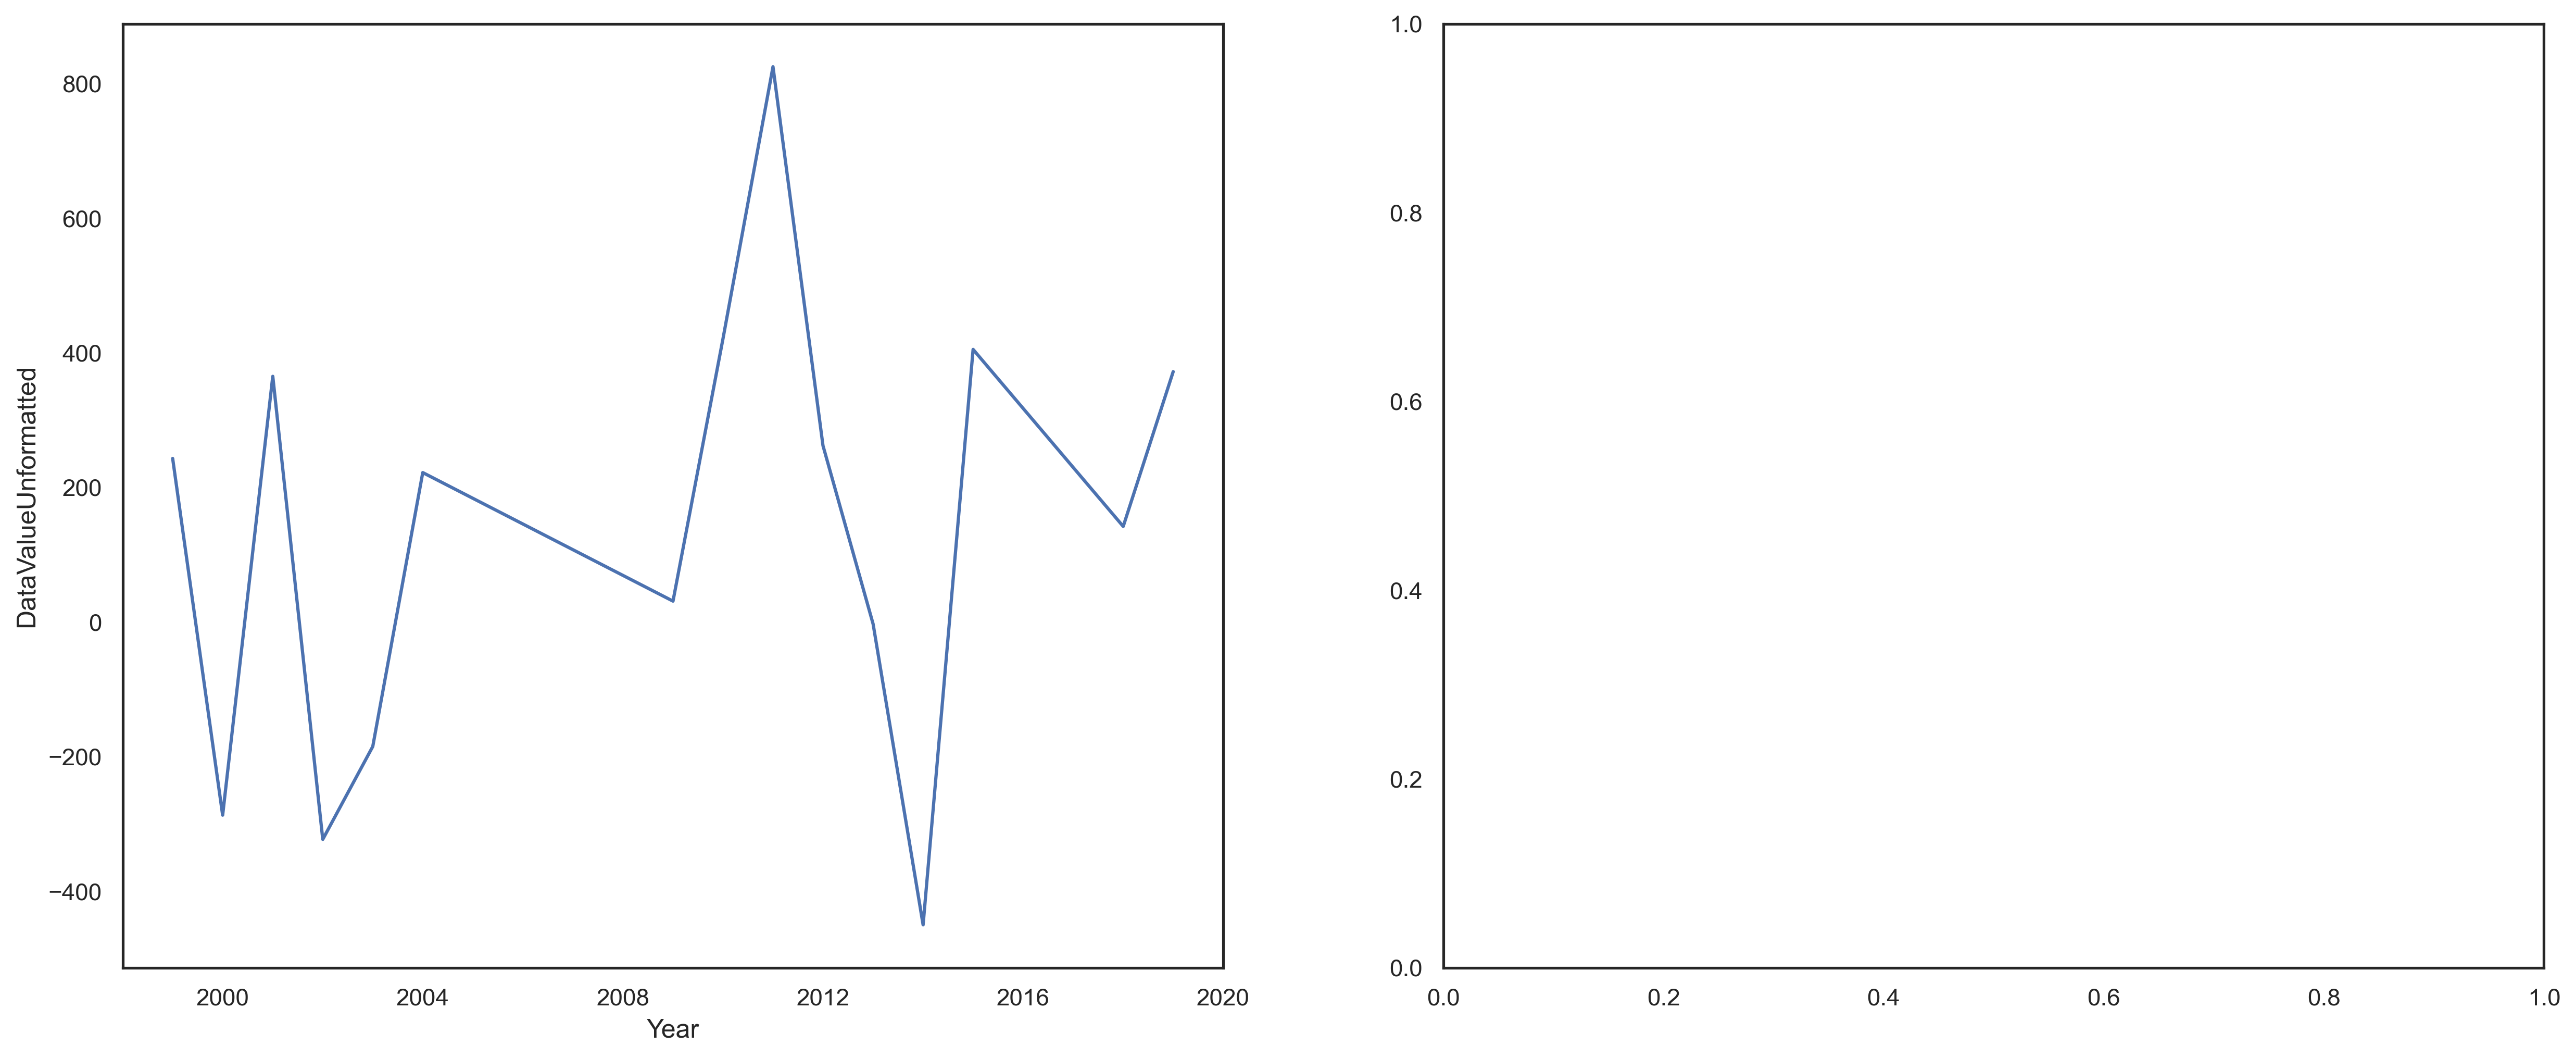

In [154]:
for x in selcountries[:20]:
    f, axes = plt.subplots(1, 2)
    sns.lineplot(data=mq.groupby('Row').get_group(x), y='DataValueUnformatted', x='Year',palette=['red'],ax=axes[0])
    axes.legend(selcountries[20:],bbox_to_anchor=(1.05, 1))

for y in selcountries[20:]:
    sns.lineplot(data=mq.groupby('Row').get_group(y), y='DataValueUnformatted', x='Year',palette=['red'],ax=axes[1])
    axes.legend(selcountries[20:],bbox_to_anchor=(1.05, 1))

plt.xticks(rotation=45)
f.show()

In [ ]:
for x in selcountries:
    sns.lineplot(data=mq.groupby('Row').get_group(x), y='DataValueUnformatted', x='Year',palette=['red'])
    

In [155]:
mq.to_csv('d_eOF.csv')